# **<center> MAESTRÍA EN INGENIERÍA - ANALÍTICA**

**Estudiante:** Luis Felipe Ortiz

**Director** Sergio Armando Gutierrez Betancur. **Codirector** John Willian Branch Bedoya

**Proyecto:** Método para predicción de la intención de compra de usuarios en línea, utilizando técnicas de aprendizaje de máquina.

**Selección del Conjunto de datos**

Se seleccionó el conjunto de datos denominado “Intención de Compradores Online” (Sakar & Kastro, 2018). **Online Shoppers Purchasing Intention Dataset** DOI: [10.24432/C5F88Q](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset). El conjunto está compuesto por 12,330 sesiones de usuarios distintos, de las cuales 15,5% resultaron en una compra efectiva. Este conjunto en particular ha sido usado en múltiples estudios previos, que han empleado tanto técnicas de aprendizaje de máquina como técnicas para analizar y predecir la intención de compra (Agustyaningrum et al., 2021; Frazier et al., 2022; Sakar et al., 2019)


**Intención de compra**

La intención de compra en sitios web de comercio electrónico puede inferirse a partir del comportamiento del usuario. Factores como la interacción prolongada con páginas de productos, múltiples visitas a páginas relacionadas y el comportamiento durante días especiales, son indicadores clave para predecir la probabilidad de una compra. En la literatura encontramos que:

La experiencia del usuario en la web, incluyendo la usabilidad y el diseño del sitio, influye significativamente en la decisión de compra. Un diseño adecuado puede simplificar la interacción y aumentar la satisfacción del usuario, lo que a su vez incrementa la probabilidad de compra (Vidal & Martin, 2020).

Los comportamientos homogéneos e interacción de los consumidores en sitios web indican que los usuarios que visitan repetidamente páginas relacionadas con productos tienden a realizar una compra. Esto se relaciona con su actitud y calidad del servicio percibido (Sulikowski et al., 2021).

La calidad de la relación electrónica y la fidelización se ven influenciadas por la experiencia de marca a través de medios sociales y sitios web durante periodos específicos como el Día de San Valentín. Estos eventos aumentan la interacción del usuario con la marca, mejorando la calidad de la relación y la lealtad del cliente (Guede & Filipe, 2019).

De ahi que, la interacción prolongada con páginas de productos, las visitas repetidas a páginas relacionadas y el comportamiento en días especiales están correlacionados con una mayor intención de compra en sitios web de comercio electrónico. Estas interacciones reflejan un compromiso y una satisfacción del usuario que son cruciales para predecir la probabilidad de realizar una compra.

**Referencias**

Sarmiento Guede, J. R. ., & Ferrão Filipe, A. J. (2019). La e-experiencia de marca a través de los medios sociales y su influencia en la e-calidad de la relación y la e-fidelización. Análisis empírico en los sitios web de viajes. Cuadernos de Turismo, 1(44), 351–380. https://doi.org/10.6018/turismo.44.404891

Sulikowski, P., Zdziebko, T., Hussain, O., & Wilbik, A. (2021). Fuzzy Approach to Purchase Intent Modeling Based on User Tracking For E-commerce Recommenders. 2021 IEEE International Conference on Fuzzy Systems (FUZZ-IEEE), 1-8. https://doi.org/10.1109/FUZZ45933.2021.9494585.

Vidal, P., & Martin, A. (2020). Experiencia de Usuario + Web Responsivo: Un Estudio desde la Perspectiva de un Enfoque Integrado. , 12, 49-75. https://doi.org/10.22305/ict-unpa.v12.n1.703.


In [1]:
# Montar Google Drive en Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Descripción del conjunto de datos:
        Administrative  Administrative_Duration  Informational  \
count     12330.000000             12330.000000   12330.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.315166                80.818611       0.503569   
std           3.321784               176.779107       1.270156   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                 7.500000       0.000000   
75%           4.000000                93.256250       0.000000   
max          27.000000              3398.750000      24.000000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             12330.000000    12330.000000             12330.000000   
unique                

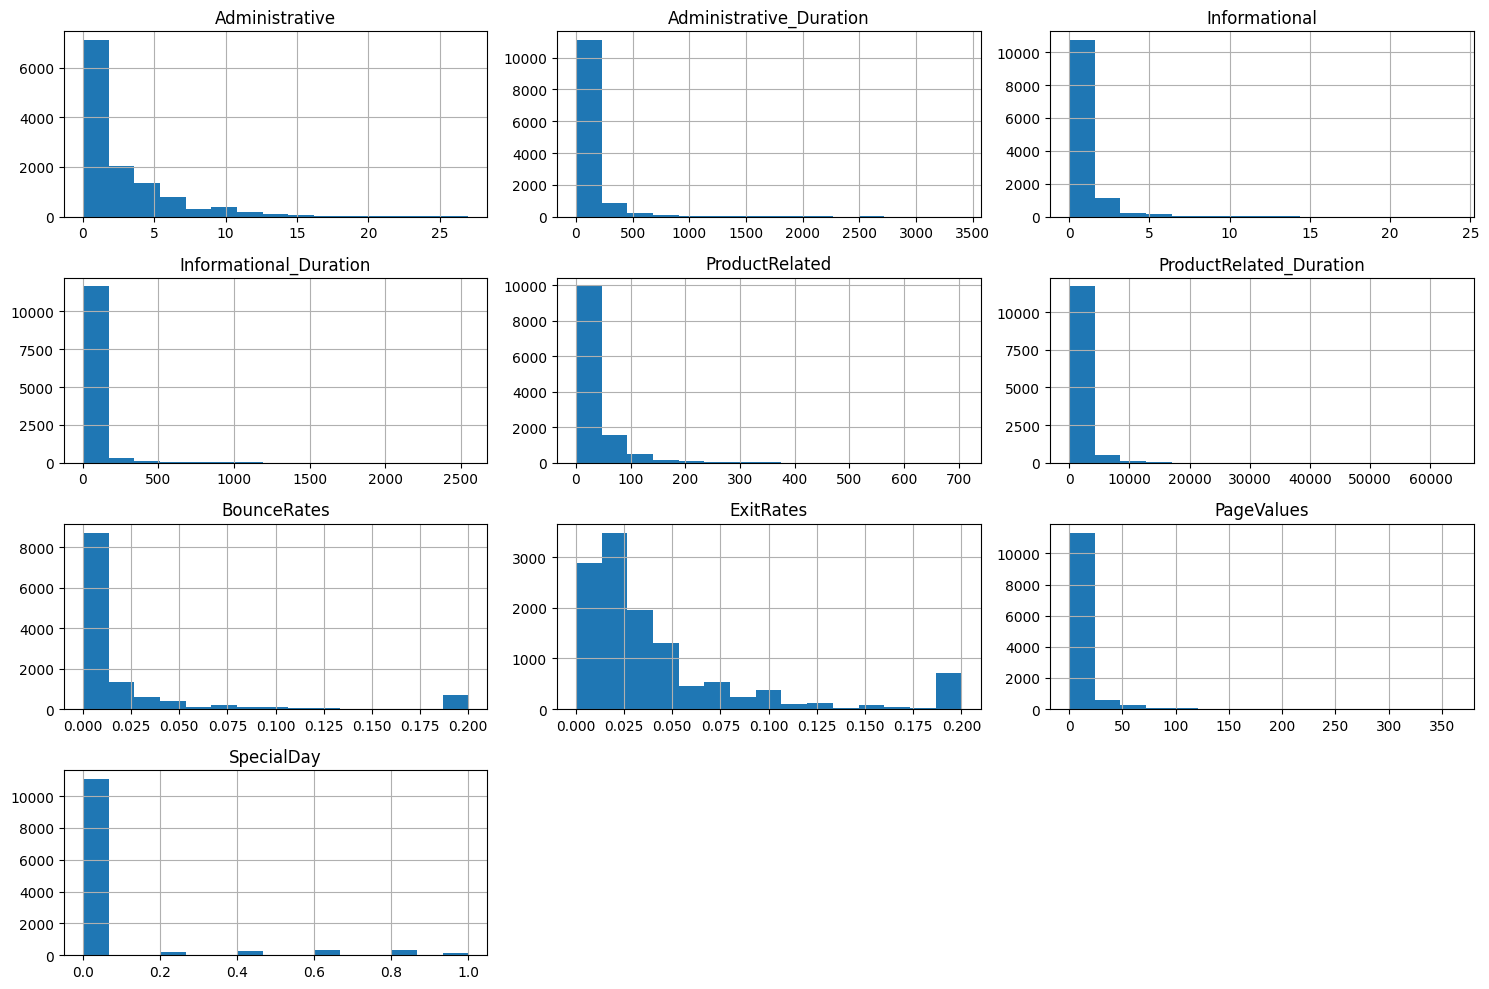


Matriz de correlación:
                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   

                         Informational  Informational_Duration  \
Administrative                0.376850                0.255848   
Administrative_Duration       0.302710                0.238031   
Informational                

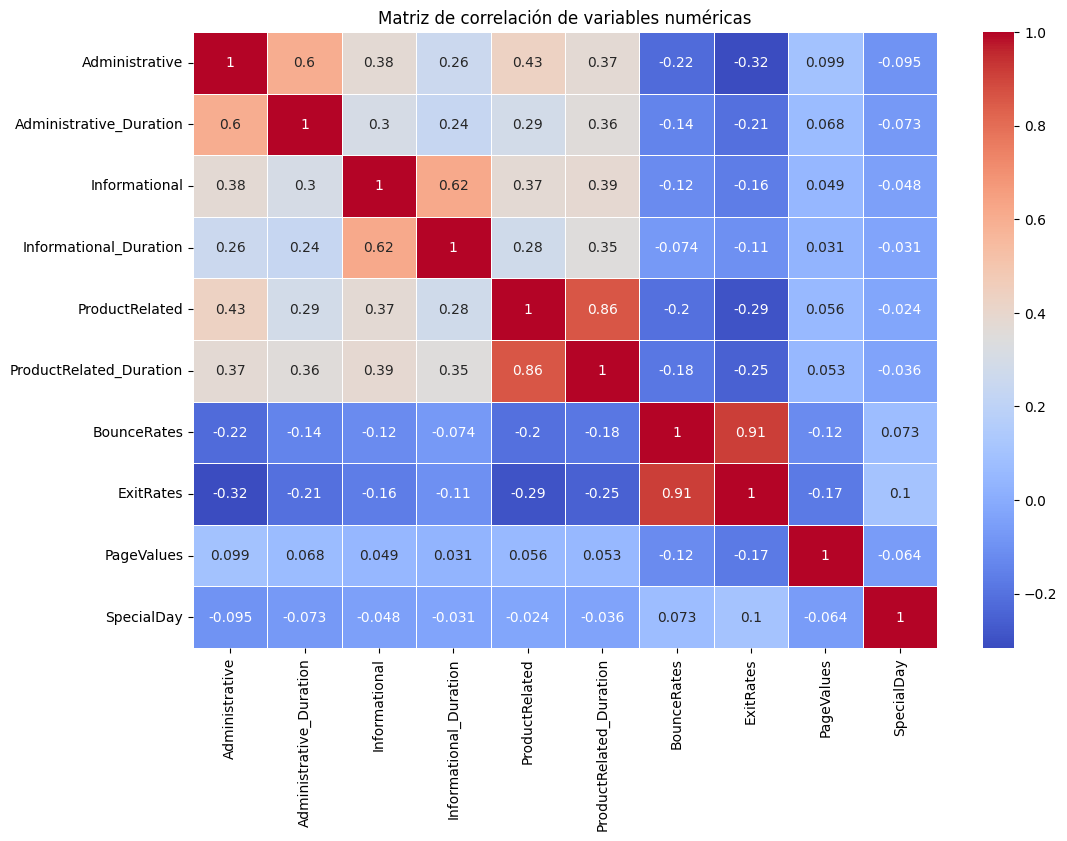

In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
file_path = '/content/drive/MyDrive/Tesis/data/online_shoppers_intention.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del conjunto de datos
df.head()

# Descripción general del conjunto de datos
print("Descripción del conjunto de datos:")
print(df.describe(include='all'))

# Información sobre el conjunto de datos
print("\nInformación del conjunto de datos:")
print(df.info())

# Distribución de las variables numéricas
numerical_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                     'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Matriz de correlación
corr_matrix = df[numerical_columns].corr()

# Matriz de correlación
print("\nMatriz de correlación:")
print(corr_matrix)

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de variables numéricas')
plt.show()


#**Análisis exploratorio de datos**

**Distribución de variables numéricas**

- Administrative: La mayoría de los usuarios visitan entre 0 y 5 páginas administrativas, con un decrecimiento rápido en la frecuencia a medida que aumenta el número de páginas visitadas.

- Administrative_Duration: Similar al número de páginas, la mayoría de los usuarios pasan poco tiempo (menos de 500 segundos) en páginas administrativas, con muy pocos usuarios pasando más tiempo.

- Informational: La distribución es muy similar a la de las páginas administrativas, con la mayoría de los usuarios visitando entre 0 y 5 páginas informativas.

- Informational_Duration: Nuevamente, la mayoría de los usuarios pasan poco tiempo (menos de 500 segundos) en páginas informativas.

- ProductRelated: La mayoría de los usuarios visitan entre 0 y 100 páginas relacionadas con productos, aunque hay algunos usuarios que visitan hasta 700 páginas, lo que muestra una distribución más dispersa en comparación con las páginas administrativas e informativas.

- ProductRelated_Duration: La mayoría de los usuarios pasan menos de 10000 segundos en páginas relacionadas con productos, pero hay algunos que pasan mucho más tiempo, incluso hasta 60000 segundos, indicando una gran variabilidad.

- BounceRates: La mayoría de los usuarios tienen una tasa de rebote muy baja (menos de 0.025), con algunas páginas teniendo tasas de rebote más altas, pero en menor cantidad.

- ExitRates: La distribución es más uniforme comparada con la tasa de rebote, pero la mayoría de las páginas tienen tasas de salida inferiores al 0.05.

- PageValues: La mayoría de las páginas tienen un valor de página muy bajo, con la mayoría de los valores concentrados en menos de 50.

- SpecialDay: La mayoría de los valores son 0, lo que indica que la mayoría de las visitas no ocurren cerca de días especiales. Hay algunos valores mayores a 0, representando visitas que ocurren más cerca de días especiales.

**Matriz de correlación**

- Administrative y Administrative_Duration: Tienen una correlación positiva fuerte (0.6). Esto indica que a medida que aumenta el número de páginas administrativas visitadas, también aumenta el tiempo que los usuarios pasan en estas páginas.

- Informational e Informational_Duration: Tienen una correlación positiva moderada (0.62). Similarmente, más páginas informativas visitadas se asocian con más tiempo en esas páginas.

- ProductRelated y ProductRelated_Duration: Muestran una correlación positiva muy fuerte (0.86). Esto sugiere que hay una relación directa entre el número de páginas relacionadas con productos visitadas y el tiempo pasado en estas páginas.

- BounceRates y ExitRates: Tienen una correlación muy fuerte (0.91). Esto indica que las páginas con altas tasas de rebote también tienden a tener altas tasas de salida.

- Administrative y ProductRelated: Correlación positiva moderada (0.43). Los usuarios que visitan más páginas administrativas también tienden a visitar más páginas de productos.

- Administrative y ExitRates: Correlación negativa moderada (-0.32). Las sesiones con más páginas administrativas visitadas tienden a tener menores tasas de salida.

- ExitRates y ProductRelated: Correlación negativa moderada (-0.29). Más páginas relacionadas con productos visitadas tienden a asociarse con menores tasas de salida.

**Conclusiones generales sobre el conjunto de datos**

- Correlaciones fuertes y moderadas: Estas indican relaciones significativas entre las variables. Por ejemplo, las correlaciones entre el número de páginas visitadas y el tiempo pasado en esas páginas son esperadas y significativas.

- Correlaciones negativas: Las correlaciones negativas, como entre Administrative y ExitRates, sugieren que ciertos comportamientos de navegación pueden reducir las tasas de salida.

- Correlaciones altas entre tasas: Las tasas de rebote y de salida están altamente correlacionadas, lo que puede indicar que las páginas que no retienen a los usuarios también tienden a ser las últimas que visitan.
